In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
data = pd.read_csv('../../../youtube/algo_trad_ml_quant_strat_freecodecamp/sp500_data.csv',
                   index_col=0, parse_dates=True, header=[0, 1])
data.head()

Adj Close                                                   \
                    A        AAL       AAPL       ABBV ABNB        ABT   
Date                                                                     
2015-09-29  31.588039  37.361626  24.716064  37.024632  NaN  33.807274   
2015-09-30  32.140408  37.027870  24.997087  38.160828  NaN  34.423519   
2015-10-01  31.588039  37.380699  24.833916  38.665810  NaN  34.885685   
2015-10-02  32.458721  36.837147  25.015219  39.149734  NaN  35.416328   
2015-10-05  33.085987  38.324741  25.105864  39.752911  NaN  35.424885   

                                                        ...    Volume  \
                 ACGL        ACN       ADBE        ADI  ...      WYNN   
Date                                                    ...             
2015-09-29  24.416668  84.097511  79.830002  45.767231  ...   6223400   
2015-09-30  24.490000  85.542664  82.220001  47.765575  ...   4265300   
2015-10-01  24.463333  85.699379  83.750000  46.520844  ...   4745600   
2015-10-02  24.780001  86.526428  83.989998  47.155910  ...  15153700   
2015-10-05  24.993334  88.467812  85.839996  48.629261  ...  12699700   

                                                                           \
                XEL       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                        
2015-09-29  3361700  13754400  1073500  1344100  6018857  2358906  895000   
2015-09-30  2722000  18176500  1558100  1708500  7378142  2012723  618800   
2015-10-01  2875200  14397800  1378600  1498600  4426718  1604019  464900   
2015-10-02  3299500  18811300  1791800  1451100  7719772  1353626  341500   
2015-10-05  5369400  18486700  2245000  2376800  5737736  1352081  460600   

                              
               ZION      ZTS  
Date                          
2015-09-29  2958200  7328400  
2015-09-30  3514200  4954100  
2015-10-01  2795500  4131800  
2015-10-02  3315700  4036800  
2015-10-05  1924800  5467700  

[5 rows x 3018 columns]

In [3]:
set(data.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [4]:
len(set(data.columns.get_level_values(1)))

503

In [5]:
data.iloc[0].name, data.iloc[-1].name

(Timestamp('2015-09-29 00:00:00'), Timestamp('2023-09-26 00:00:00'))

In [3]:
sp500_df = pd.read_csv('../data/^GSPC_2015-09-29_2023-09-26_1d.csv', index_col=0, header=[0, 1])
sp500_df = sp500_df.droplevel(level='Ticker', axis=1)
sp500_df.drop(['Dividends', 'Stock Splits'], inplace=True, axis=1)
sp500_df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-09-29,1884.089966,1899.479980,1871.910034,1881.900024,4132390000
2015-09-30,1920.030029,1920.530029,1887.140015,1887.140015,4525070000
2015-10-01,1923.819946,1927.209961,1900.699951,1919.650024,3983600000
2015-10-02,1951.359985,1951.359985,1893.699951,1921.770020,4378570000
2015-10-05,1987.050049,1989.170044,1954.329956,1954.329956,4334490000


## Returns

In [4]:
sp500 = pd.DataFrame(sp500_df['Close'])
sp500['return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['cumm_return'] = sp500['return'].cumsum().apply(np.exp)
sp500.dropna(axis=0, inplace=True)
sp500.index = pd.to_datetime(sp500.index)
sp500.head()

,Close,return,cumm_return
Date,,,
2015-09-30,1920.030029,0.018896,1.019076
2015-10-01,1923.819946,0.001972,1.021087
2015-10-02,1951.359985,0.014214,1.035704
2015-10-05,1987.050049,0.018125,1.054647
2015-10-06,1979.920044,-0.003595,1.050863


In [5]:
tickers = data['Adj Close'].copy()
for col in tickers.columns:
    tickers[f'{col}_return'] = np.log(tickers[col] / tickers[col].shift(1))
    tickers[f'{col}_cumm_return'] = tickers[f'{col}_return'].cumsum().apply(np.exp)

tickers.drop(index=tickers.index[0], inplace=True)
tickers.head()

<ipython-input-5-955d7be07624>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{col}_cumm_return'] = tickers[f'{col}_return'].cumsum().apply(np.exp)
<ipython-input-5-955d7be07624>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{col}_return'] = np.log(tickers[col] / tickers[col].shift(1))


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_return,YUM_cumm_return,ZBH_return,ZBH_cumm_return,ZBRA_return,ZBRA_cumm_return,ZION_return,ZION_cumm_return,ZTS_return,ZTS_cumm_return
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,32.140408,37.027870,24.997087,38.160828,NaN,34.423519,24.490000,85.542664,82.220001,47.765575,...,0.048696,1.049902,0.001492,1.001493,0.058366,1.060103,0.005827,1.005844,0.037862,1.038588
2015-10-01,31.588039,37.380699,24.833916,38.665810,NaN,34.885685,24.463333,85.699379,83.750000,46.520844,...,-0.001001,1.048851,0.000319,1.001813,0.004041,1.064396,-0.000363,1.005478,0.002667,1.041362
2015-10-02,32.458721,36.837147,25.015219,39.149734,NaN,35.416328,24.780001,86.526428,83.989998,47.155910,...,0.021429,1.071569,0.013846,1.015780,0.024039,1.090292,-0.007657,0.997809,0.041045,1.084994
2015-10-05,33.085987,38.324741,25.105864,39.752911,NaN,35.424885,24.993334,88.467812,85.839996,48.629261,...,0.017613,1.090611,0.002411,1.018232,0.011743,1.103171,0.019573,1.017531,-0.003959,1.080706
2015-10-06,32.674053,36.360359,25.225985,38.630745,NaN,34.141060,24.833332,88.363335,85.150002,48.172020,...,0.004445,1.095470,-0.015938,1.002132,-0.019266,1.082122,0.009645,1.027392,-0.034666,1.043884


In [11]:
tickers.shape, sp500['return'].shape

((2011, 1509), (2010,))

In [7]:
diff_idx = tickers.index.difference(sp500.index)
diff_idx

DatetimeIndex(['2023-09-26'], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
tickers.loc[diff_idx]

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_return,YUM_cumm_return,ZBH_return,ZBH_cumm_return,ZBRA_return,ZBRA_cumm_return,ZION_return,ZION_cumm_return,ZTS_return,ZTS_cumm_return
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-26,110.507202,12.7,171.733749,152.384705,132.279999,95.700241,81.260002,309.327057,506.299988,172.339996,...,-0.007711,2.630932,-0.042563,1.312574,-0.018536,3.10151,-0.017209,1.509606,-0.004794,4.712618


In [9]:
tickers.drop(diff_idx, axis=0, inplace=True)

In [9]:
tickers.shape, sp500['return'].shape

((2010, 1509), (2010,))

In [10]:
tickers_list = list(set(data.columns.get_level_values(1)))
tickers_return_list = [ticker+'_return' for ticker in tickers_list]
tickers_cum_return_list = [ticker+'_cumm_return' for ticker in tickers_list]

## Visualization

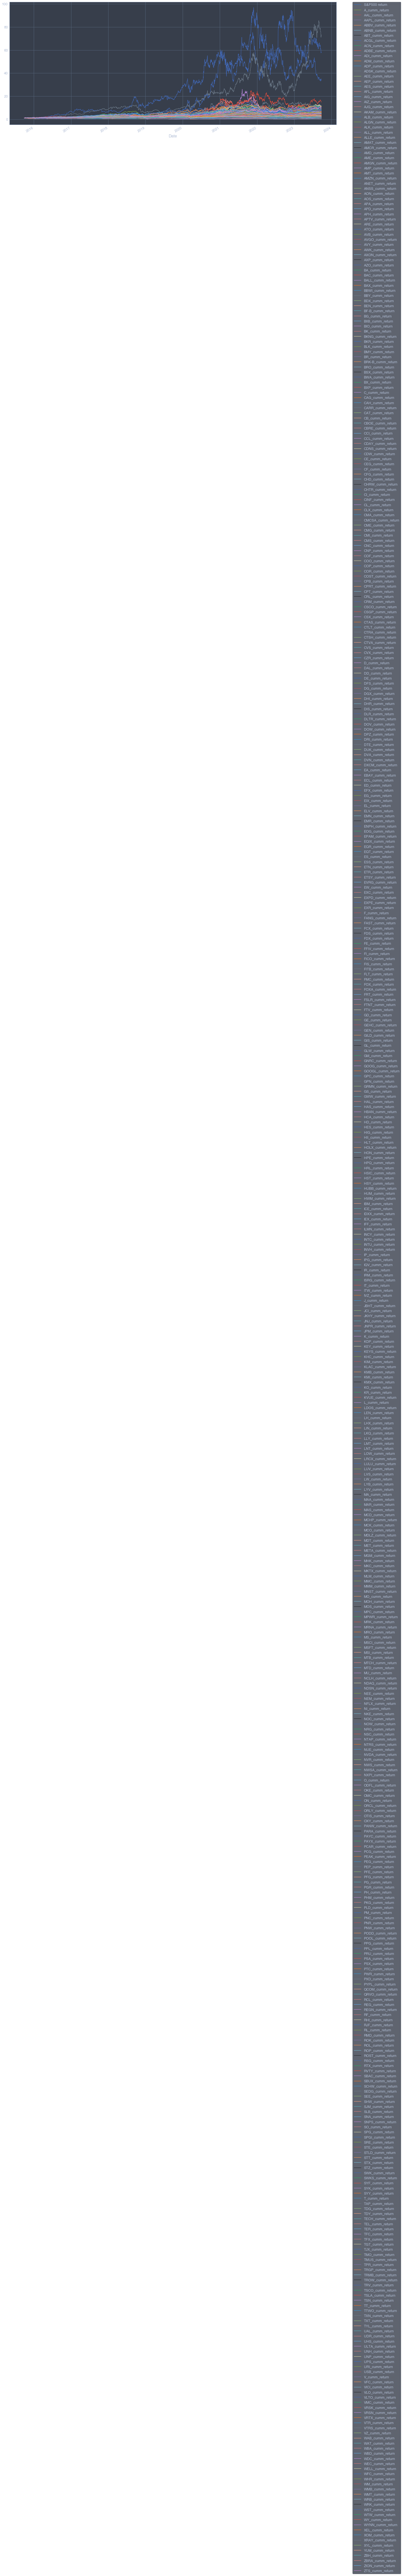

In [19]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return')
for ticker in data['Adj Close'].columns:
    tickers[f'{ticker}_cumm_return'].plot(ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [11]:
# sort values by cumm_return!
cumm_return = [ticker+'_cumm_return' for ticker in tickers_list]
tickers[cumm_return].iloc[-1].sort_values(ascending=False)[:14]

NVDA_cumm_return    73.234452
AMD_cumm_return     58.311377
ENPH_cumm_return    34.112676
TSLA_cumm_return    15.020678
ANET_cumm_return    11.906029
CDNS_cumm_return    11.313600
LRCX_cumm_return    11.165784
KLAC_cumm_return    11.151047
FICO_cumm_return    10.757506
ON_cumm_return      10.403084
AMAT_cumm_return    10.396745
CPRT_cumm_return    10.391135
ODFL_cumm_return    10.266046
MPWR_cumm_return     9.799134
Name: 2023-09-25 00:00:00, dtype: float64

## Research

In [11]:
for ticker in tickers_return_list:
    t = ticker.split('_')[0]
    tickers[f'{t}_compare'] = (tickers[ticker] > sp500['return']).astype(int)

tickers.head()

<ipython-input-11-aad457bf89a5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tickers[f'{t}_compare'] = (tickers[ticker] > sp500['return']).astype(int)


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,DOW_compare,IVZ_compare,WY_compare,EBAY_compare,MET_compare,ELV_compare,ZTS_compare,JBHT_compare,AAPL_compare,RVTY_compare
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,32.140408,37.027870,24.997087,38.160828,NaN,34.423519,24.490000,85.542664,82.220001,47.765575,...,0,0,0,0,0,0,1,0,0,0
2015-10-01,31.588039,37.380699,24.833916,38.665810,NaN,34.885685,24.463333,85.699379,83.750000,46.520844,...,0,1,0,1,1,0,1,1,0,0
2015-10-02,32.458721,36.837147,25.015219,39.149734,NaN,35.416328,24.780001,86.526428,83.989998,47.155910,...,0,0,1,1,0,1,1,0,0,1
2015-10-05,33.085987,38.324741,25.105864,39.752911,NaN,35.424885,24.993334,88.467812,85.839996,48.629261,...,0,1,1,0,0,0,0,0,0,0
2015-10-06,32.674053,36.360359,25.225985,38.630745,NaN,34.141060,24.833332,88.363335,85.150002,48.172020,...,0,1,0,1,0,0,0,1,1,1


In [12]:
compare_cols = [ticker+'_compare' for ticker in tickers_list]

top_sp500 = tickers[compare_cols].mean()[tickers[compare_cols].mean()>0.53].index.to_list()
top_sp500 = [ticker.split('_')[0]+'_cumm_return' for ticker in top_sp500]

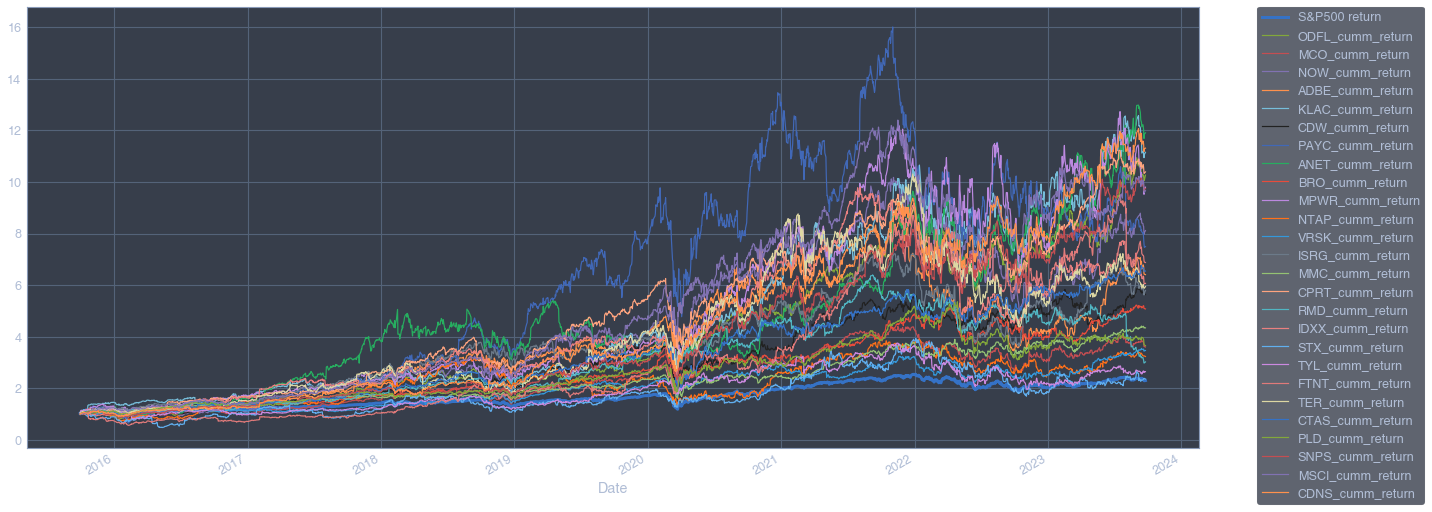

In [22]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3)
tickers[top_sp500].plot(ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Above S&P500 by years

In [23]:
above_sp500_by_years = {}
for year in np.arange(2016, 2024):
    above_sp500_by_years[year] = tickers.loc[str(year)][compare_cols].mean()[
                                     tickers.loc[str(year)][compare_cols].mean()>.55
                                 ].sort_values(ascending=False)

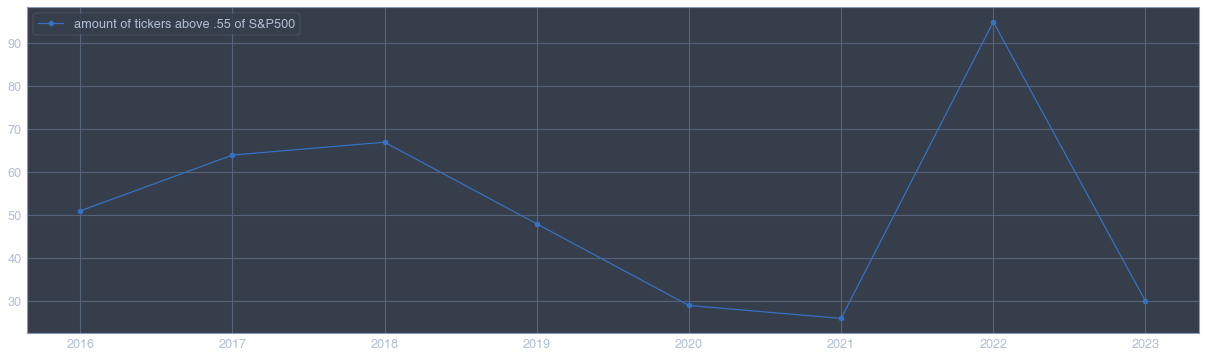

In [24]:
above_55 = [len(tickers) for tickers in above_sp500_by_years.values()]

fig = plt.figure(figsize=(21, 6))
plt.plot(np.arange(2016, 2024), above_55, marker='o', label='amount of tickers above .55 of S&P500')
plt.legend()

## Starting Position

In [13]:
tickers.dropna(axis=1, inplace=True)

In [36]:
TICKERS_collection = {}

In [14]:
initial_cap = 100_000

In [51]:
# GENERATE ONCE!
N = np.random.choice(np.arange(10, 21))
random_tickers = np.random.choice(tickers_list,
                                  size=N,
                                  replace=False)

weights = np.random.randint(1, 11, N)
weights = np.round(weights / sum(weights), 2)

random_portfolio = {ticker:weight for ticker, weight in zip(random_tickers, weights)}
random_portfolio

{'GPN': 0.05,
 'DFS': 0.06,
 'NUE': 0.1,
 'KIM': 0.1,
 'MMM': 0.1,
 'WY': 0.03,
 'GL': 0.04,
 'ETR': 0.08,
 'JCI': 0.1,
 'ARE': 0.06,
 'PAYX': 0.05,
 'CZR': 0.09,
 'PM': 0.05,
 'SCHW': 0.09}

In [14]:
N = 14
random_portfolio = {
    'GPN': 0.05, 'DFS' : 0.06, 'NUE': 0.1,
    'KIM': 0.1,  'MMM' : 0.1,  'WY' : 0.03,
    'GL' : 0.04, 'ETR' : 0.08, 'JCI': 0.1,
    'ARE': 0.06, 'PAYX': 0.05, 'CZR': 0.09,
    'PM' : 0.05, 'SCHW': 0.09,
}

In [39]:
TICKERS_collection['random_portfolio'] = list(random_portfolio.keys())

In [15]:
tickers[random_portfolio.keys()].iloc[0]

GPN      55.784492
DFS      43.523743
NUE      30.654959
KIM      16.442160
MMM     108.447609
WY       19.604715
GL       52.782074
ETR      47.040302
JCI      25.540625
ARE      66.502792
PAYX     37.410553
CZR       9.020000
PM       52.586315
SCHW     25.824799
Name: 2015-09-30 00:00:00, dtype: float64

In [15]:
init_prices = tickers[random_portfolio.keys()].iloc[0]
weights_per = np.array(list(random_portfolio.values()))*100

initial_portfolio = init_prices * pd.Series(index=random_portfolio.keys(),
                                            data=weights_per)
initial_portfolio

GPN      278.922462
DFS      261.142456
NUE      306.549587
KIM      164.421597
MMM     1084.476089
WY        58.814146
GL       211.128296
ETR      376.322418
JCI      255.406246
ARE      399.016754
PAYX     187.052765
CZR       81.180004
PM       262.931576
SCHW     232.423187
dtype: float64

In [16]:
sum(initial_portfolio)

4159.78758430481

In [16]:
random_portfolio_weighted_df = pd.DataFrame(
    columns=['portfolio'],
    data=(tickers[random_portfolio.keys()]*np.array(list(random_portfolio.values()))*100).sum(axis=1)
)
random_portfolio_weighted_df['return'] = np.log(random_portfolio_weighted_df['portfolio']
                                                / random_portfolio_weighted_df['portfolio'].shift(1))
random_portfolio_weighted_df['cumm_return'] = random_portfolio_weighted_df['return'].cumsum().apply(np.exp)
random_portfolio_weighted_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,4159.787584,NaN,NaN
2015-10-01,4158.364932,-0.000342,0.999658
2015-10-02,4202.947674,0.010664,1.010376
2015-10-05,4289.130714,0.020298,1.031094
2015-10-06,4269.982732,-0.004474,1.026491


In [17]:
random_portfolio_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[random_portfolio.keys()].sum(axis=1)
)
random_portfolio_df['return'] = np.log(random_portfolio_df['portfolio']
                                       / random_portfolio_df['portfolio'].shift(1))
random_portfolio_df['cumm_return'] = random_portfolio_df['return'].cumsum().apply(np.exp)
random_portfolio_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,591.165138,NaN,NaN
2015-10-01,591.302083,0.000232,1.000232
2015-10-02,597.184652,0.009899,1.010182
2015-10-05,608.686245,0.019077,1.029638
2015-10-06,605.879676,-0.004622,1.024891


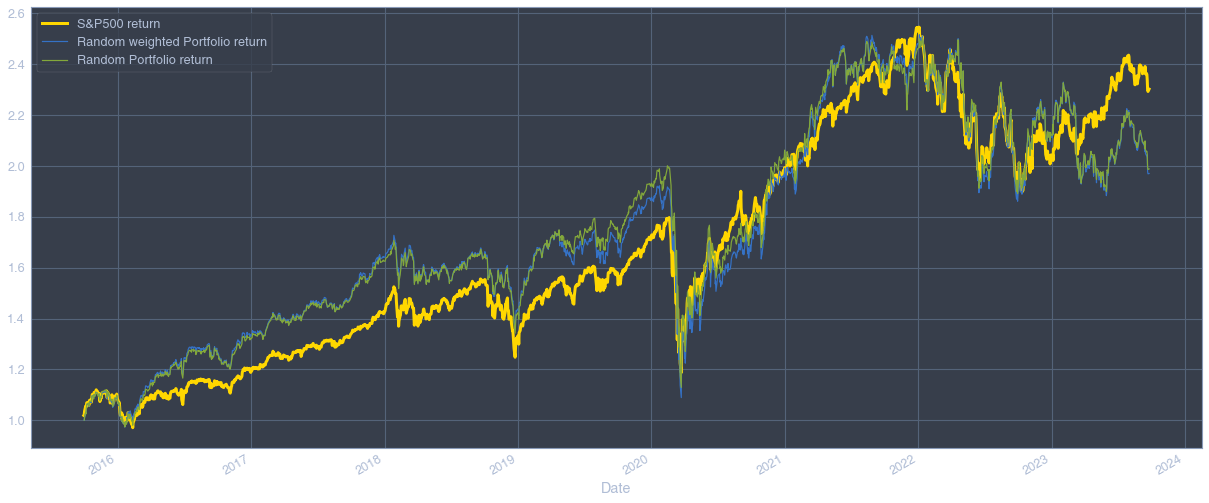

In [18]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
random_portfolio_weighted_df['cumm_return'].plot(ax=ax, label='Random weighted Portfolio return')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
ax.legend()

In [27]:
random_portfolio_df['cumm_return'].iloc[-1], random_portfolio_weighted_df['cumm_return'].iloc[-1]

(1.9883711788201373, 1.9702427887130856)

## Split Data

In [18]:
train = tickers.loc[:'2018'].copy()
test = tickers.loc['2019':].copy()

In [20]:
train.shape

(819, 1952)

In [19]:
tickers_from_train = train[compare_cols].mean().sort_values(ascending=False)[:N].index.to_list()
tickers_from_train = [ticker.split('_')[0] for ticker in tickers_from_train]
tickers_from_train

['PAYC',
 'SYK',
 'ISRG',
 'MPWR',
 'MA',
 'TER',
 'ANET',
 'ALGN',
 'NOW',
 'IDXX',
 'V',
 'KLAC',
 'BAX',
 'TYL']

In [40]:
TICKERS_collection['train_best'] = tickers_from_train

In [20]:
train_best_weighted_df = pd.DataFrame(
    columns=['portfolio'],
    data=(tickers[tickers_from_train]*np.array(list(random_portfolio.values()))*100).sum(axis=1)
)
train_best_weighted_df['return'] = np.log(train_best_weighted_df['portfolio']
                                          / train_best_weighted_df['portfolio'].shift(1))
train_best_weighted_df['cumm_return'] = train_best_weighted_df['return'].cumsum().apply(np.exp)
train_best_weighted_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,6444.720737,NaN,NaN
2015-10-01,6583.792377,0.021350,1.021579
2015-10-02,6709.328428,0.018888,1.041058
2015-10-05,6837.409439,0.018910,1.060932
2015-10-06,6741.363773,-0.014147,1.046029


In [21]:
train_best_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[tickers_from_train].sum(axis=1)
)
train_best_df['return'] = np.log(train_best_df['portfolio'] / train_best_df['portfolio'].shift(1))
train_best_df['cumm_return'] = train_best_df['return'].cumsum().apply(np.exp)
train_best_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,825.555892,NaN,NaN
2015-10-01,840.709049,0.018189,1.018355
2015-10-02,857.075250,0.019280,1.038180
2015-10-05,872.075530,0.017350,1.056349
2015-10-06,859.698954,-0.014294,1.041358


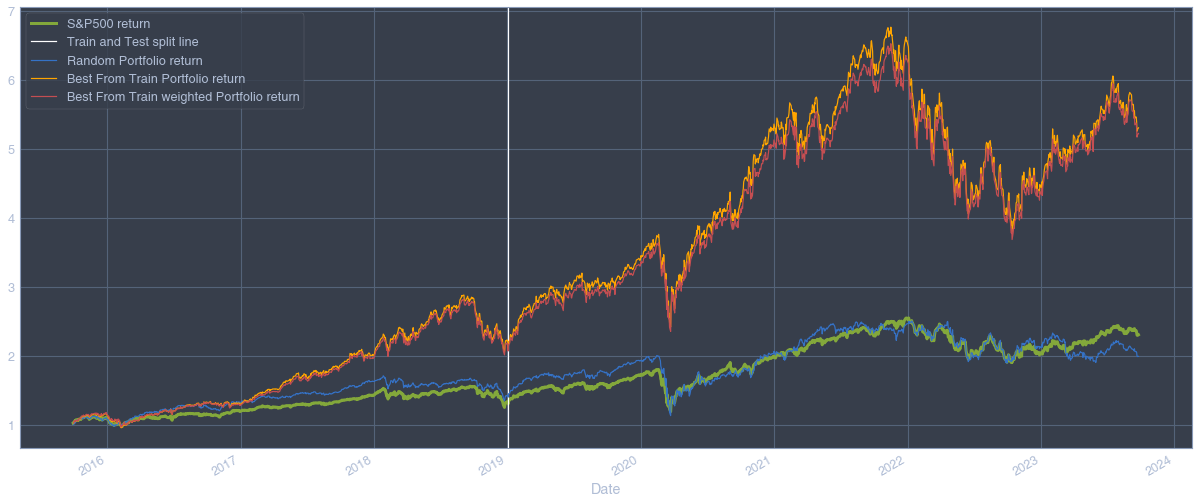

In [23]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='g')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
train_best_df['cumm_return'].plot(ax=ax, label='Best From Train Portfolio return', c='orange')
train_best_weighted_df['cumm_return'].plot(ax=ax, label='Best From Train weighted Portfolio return', c='r')
ax.legend()

In [26]:
train_best_df['cumm_return'].iloc[-1], train_best_weighted_df['cumm_return'].iloc[-1]

(5.304699370945057, 5.223158205249668)

## SMA. 50&200 days

In [22]:
train_tickers_list = [tickers for tickers in train if len(tickers.split('_'))==1]
sma_50 = [ticker+'_sma_50' for ticker in train_tickers_list]
sma_200 = [ticker+'_sma_200' for ticker in train_tickers_list]

In [23]:
for ticker in train_tickers_list:
    train[ticker+'_sma_50'] = train[ticker].rolling(50).mean()
    train[ticker+'_sma_200'] = train[ticker].rolling(200).mean()

<ipython-input-23-56f7f595c658>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train[ticker+'_sma_50'] = train[ticker].rolling(50).mean()
<ipython-input-23-56f7f595c658>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train[ticker+'_sma_200'] = train[ticker].rolling(200).mean()


In [24]:
train.dropna(inplace=True)

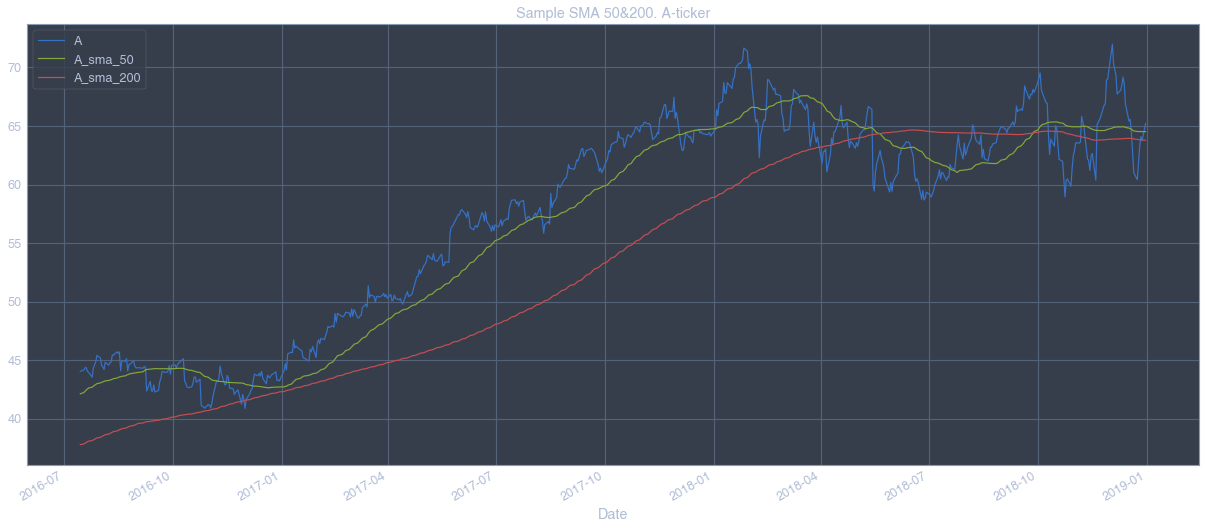

In [32]:
fig, ax = plt.subplots(1, figsize=(21, 9))
train['A'].plot(ax=ax, label='A')
train['A_sma_50'].plot(ax=ax, label='A_sma_50')
train['A_sma_200'].plot(ax=ax, label='A_sma_200')
ax.set_title('Sample SMA 50&200. A-ticker')
ax.legend()

In [25]:
for ticker in train_tickers_list:
    train[ticker+'_sma_crossing'] = np.where(train[ticker+'_sma_50'] > train[ticker+'_sma_200'], 1, 0)
    

<ipython-input-25-e5e33b34265c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train[ticker+'_sma_crossing'] = np.where(train[ticker+'_sma_50'] > train[ticker+'_sma_200'], 1, 0)


In [26]:
crossing = [ticker+'_sma_crossing' for ticker in train_tickers_list]

sma_tickers = train[crossing].mean().sort_values(ascending=False)[:N].index.to_list()
sma_tickers = [ticker.split('_')[0] for ticker in sma_tickers]
sma_tickers

['ZTS',
 'PAYC',
 'INTU',
 'RSG',
 'ICE',
 'CSX',
 'TDY',
 'GRMN',
 'KEYS',
 'UNH',
 'V',
 'AJG',
 'CME',
 'ROL']

In [41]:
TICKERS_collection['sma_tickers'] = sma_tickers

In [27]:
sma_best_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[sma_tickers].sum(axis=1)
)
sma_best_df['return'] = np.log(sma_best_df['portfolio'] / sma_best_df['portfolio'].shift(1))
sma_best_df['cumm_return'] = sma_best_df['return'].cumsum().apply(np.exp)
sma_best_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,674.689020,NaN,NaN
2015-10-01,674.780896,0.000136,1.000136
2015-10-02,680.726724,0.008773,1.008949
2015-10-05,689.187567,0.012353,1.021489
2015-10-06,678.642185,-0.015419,1.005859


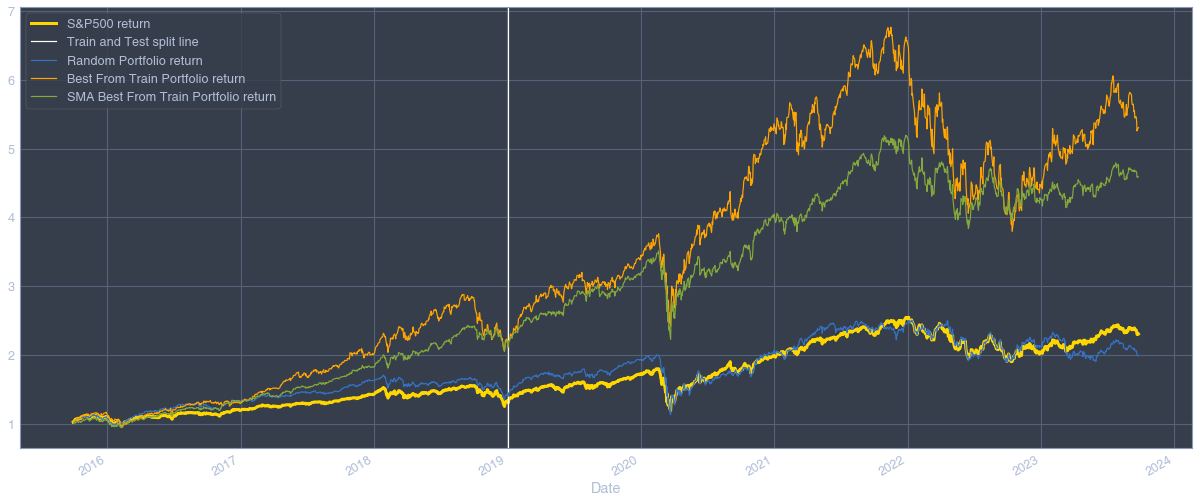

In [28]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
train_best_df['cumm_return'].plot(ax=ax, label='Best From Train Portfolio return', c='orange')
sma_best_df['cumm_return'].plot(ax=ax, label='SMA Best From Train Portfolio return')
ax.legend()

In [35]:
train.iloc[0].name, train.iloc[-1].name

(Timestamp('2016-07-15 00:00:00'), Timestamp('2018-12-31 00:00:00'))

## DeepSeek

In [28]:
deepseek_tickers_list = [
    'NVDA', 'AMD', 'MSFT', 'ADBE',
    'PYPL', 'MA', 'V', 'AMZN',
    'NFLX', 'BKNG', 'MCD', 'UNH',
    'CAT', 'BA'
]

In [42]:
TICKERS_collection['deepseek_tickers_list'] = deepseek_tickers_list

In [29]:
deepseek_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[deepseek_tickers_list].sum(axis=1)
)
deepseek_df['return'] = np.log(deepseek_df['portfolio'] / deepseek_df['portfolio'].shift(1))
deepseek_df['cumm_return'] = deepseek_df['return'].cumsum().apply(np.exp)
deepseek_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,2029.788072,NaN,NaN
2015-10-01,2045.903237,0.007908,1.007939
2015-10-02,2075.401816,0.014315,1.022472
2015-10-05,2102.587096,0.013014,1.035865
2015-10-06,2097.394672,-0.002473,1.033307


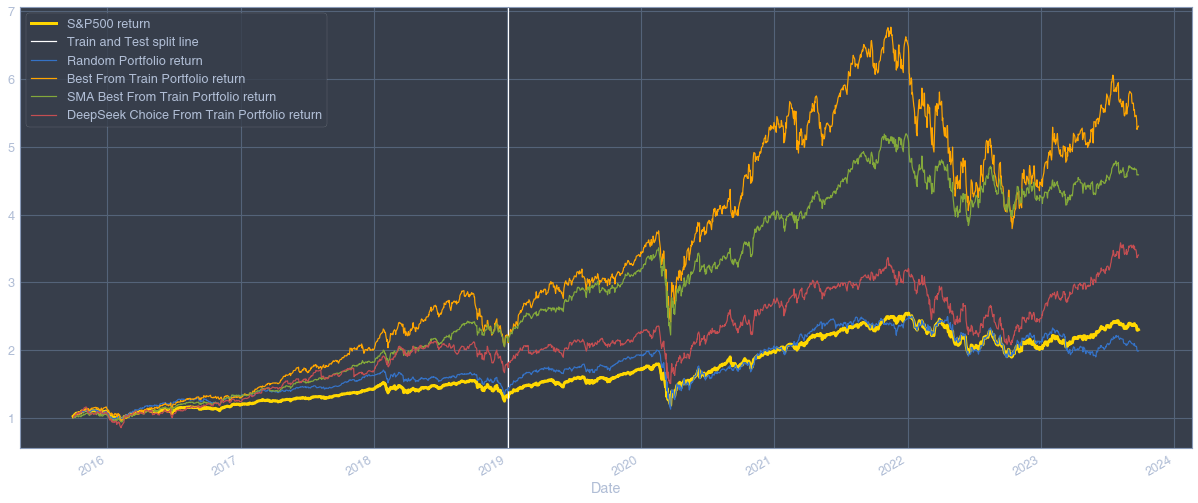

In [41]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
train_best_df['cumm_return'].plot(ax=ax, label='Best From Train Portfolio return', c='orange')
sma_best_df['cumm_return'].plot(ax=ax, label='SMA Best From Train Portfolio return')
deepseek_df['cumm_return'].plot(ax=ax, label='DeepSeek Choice From Train Portfolio return')
ax.legend()

## By Volatility

In [30]:
data = {ticker:train[ticker+'_return'].std() for ticker in train_tickers_list}
most_vol = pd.Series(data).sort_values(ascending=False).iloc[:N].index.to_list()
less_vol = pd.Series(data).sort_values().iloc[:N].index.to_list()
most_less_vol = pd.Series(data).sort_values(ascending=False).iloc[:int(N/2)].index.to_list()\
              + pd.Series(data).sort_values().iloc[:int(N/2)].index.to_list()

In [31]:
most_vol_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[most_vol].sum(axis=1)
)
most_vol_df['return'] = np.log(most_vol_df['portfolio'] / most_vol_df['portfolio'].shift(1))
most_vol_df['cumm_return'] = most_vol_df['return'].cumsum().apply(np.exp)
most_vol_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,255.609183,NaN,NaN
2015-10-01,253.892724,-0.006738,0.993285
2015-10-02,263.684371,0.037841,1.031592
2015-10-05,271.986178,0.030998,1.064070
2015-10-06,275.205600,0.011767,1.076666


In [32]:
less_vol_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[less_vol].sum(axis=1)
)
less_vol_df['return'] = np.log(less_vol_df['portfolio'] / less_vol_df['portfolio'].shift(1))
less_vol_df['cumm_return'] = less_vol_df['return'].cumsum().apply(np.exp)
less_vol_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,661.225847,NaN,NaN
2015-10-01,660.964296,-0.000396,0.999604
2015-10-02,667.869055,0.010392,1.010047
2015-10-05,678.079890,0.015173,1.025489
2015-10-06,677.534417,-0.000805,1.024664


In [33]:
most_less_vol_df = pd.DataFrame(
    columns=['portfolio'],
    data=tickers[most_less_vol].sum(axis=1)
)
most_less_vol_df['return'] = np.log(most_less_vol_df['portfolio'] / most_less_vol_df['portfolio'].shift(1))
most_less_vol_df['cumm_return'] = most_less_vol_df['return'].cumsum().apply(np.exp)
most_less_vol_df.head()

,portfolio,return,cumm_return
Date,,,
2015-09-30,446.998623,NaN,NaN
2015-10-01,447.421037,0.000945,1.000945
2015-10-02,453.242742,0.012928,1.013969
2015-10-05,460.964482,0.016893,1.031244
2015-10-06,460.673679,-0.000631,1.030593


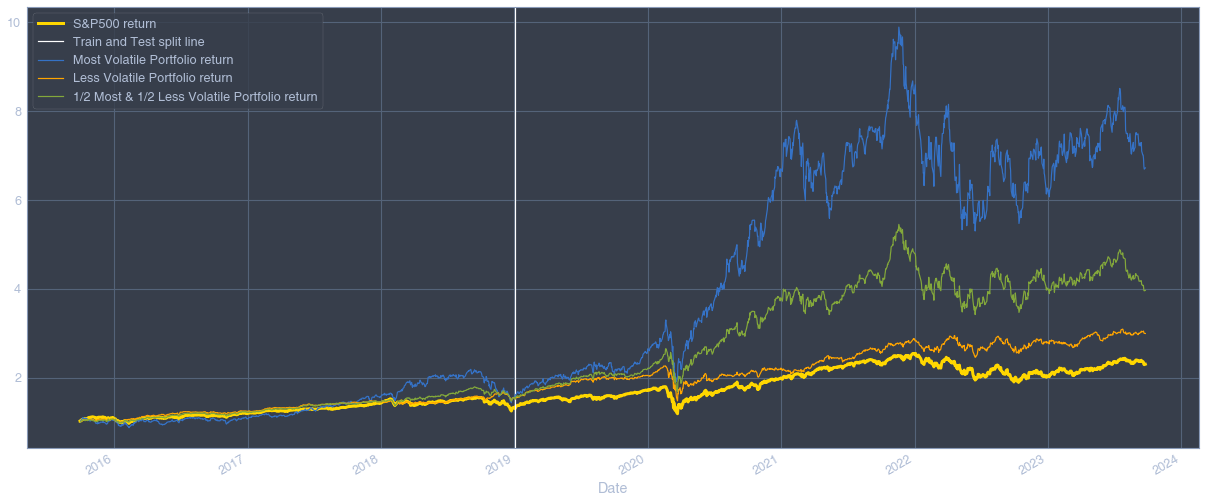

In [42]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
most_vol_df['cumm_return'].plot(ax=ax, label='Most Volatile Portfolio return')
less_vol_df['cumm_return'].plot(ax=ax, label='Less Volatile Portfolio return', c='orange')
most_less_vol_df['cumm_return'].plot(ax=ax, label='1/2 Most & 1/2 Less Volatile Portfolio return')
ax.legend()

In [46]:
TICKERS_collection['most_vol'] = most_vol

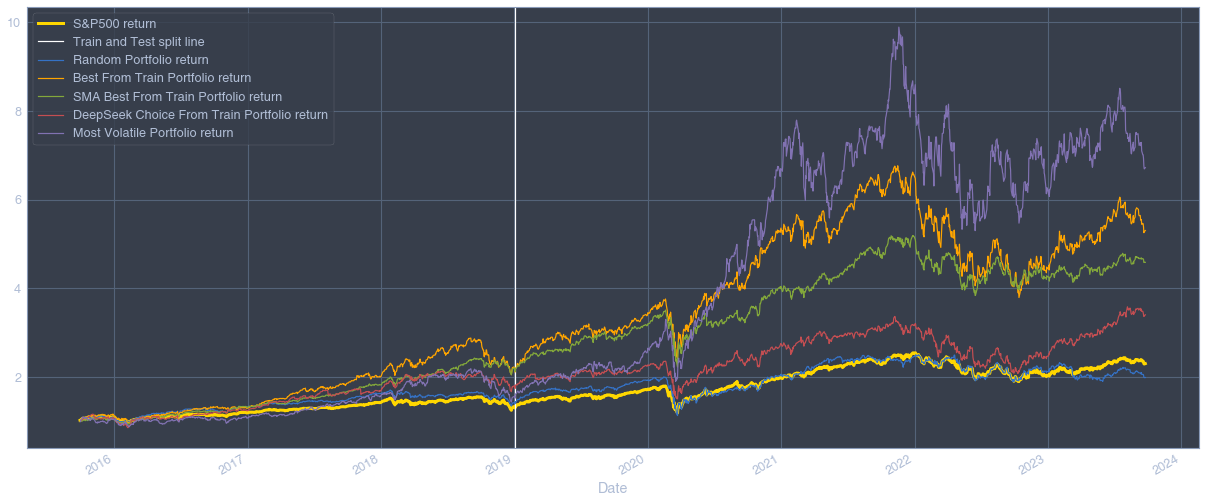

In [35]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
train_best_df['cumm_return'].plot(ax=ax, label='Best From Train Portfolio return', c='orange')
sma_best_df['cumm_return'].plot(ax=ax, label='SMA Best From Train Portfolio return')
deepseek_df['cumm_return'].plot(ax=ax, label='DeepSeek Choice From Train Portfolio return')
most_vol_df['cumm_return'].plot(ax=ax, label='Most Volatile Portfolio return')
ax.legend()

## Combinations of Portfolio

In [34]:
sp500_train_return = sp500.loc[train.index]['return']
ts = train[compare_cols].mean()[train[compare_cols].mean()>0.53].index.to_list()
ts = [ticker.split('_')[0] for ticker in ts]

### Information Ratio

In [51]:
def info_ratio(portfolio, data='train'):
    portfolio = [ticker+'_return' for ticker in portfolio]
    if data=='test':
        returns = test[portfolio].sum(axis=1)
    elif data=='ticker':
        returns = ticker[portfolio].sum(axis=1)
    else:
        returns = train[portfolio].sum(axis=1)
        
    return (returns - sp500_train_return).mean()*252 / ((returns - sp500_train_return).std()*np.sqrt(252))
    

In [53]:
info_ratio(['A']), info_ratio(['A','NVDA', 'MSFT'])

(0.5768886646216117, 1.1574598926638182)

### Sharpe Ratio

In [52]:
def sharpe_ratio(portfolio, data='train'):
    portfolio = [ticker+'_return' for ticker in portfolio]
    if data=='test':
        returns = test[portfolio].sum(axis=1)
    elif data=='ticker':
        returns = ticker[portfolio].sum(axis=1)
    else:
        returns = train[portfolio].sum(axis=1)
        
    annual_return = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    
    return (annual_return - 0.0225) / annual_volatility


In [47]:
TICKERS_collection

{'random_portfolio': ['GPN',
  'DFS',
  'NUE',
  'KIM',
  'MMM',
  'WY',
  'GL',
  'ETR',
  'JCI',
  'ARE',
  'PAYX',
  'CZR',
  'PM',
  'SCHW'],
 'train_best': ['PAYC',
  'SYK',
  'ISRG',
  'MPWR',
  'MA',
  'TER',
  'ANET',
  'ALGN',
  'NOW',
  'IDXX',
  'V',
  'KLAC',
  'BAX',
  'TYL'],
 'sma_tickers': ['ZTS',
  'PAYC',
  'INTU',
  'RSG',
  'ICE',
  'CSX',
  'TDY',
  'GRMN',
  'KEYS',
  'UNH',
  'V',
  'AJG',
  'CME',
  'ROL'],
 'deepseek_tickers_list': ['NVDA',
  'AMD',
  'MSFT',
  'ADBE',
  'PYPL',
  'MA',
  'V',
  'AMZN',
  'NFLX',
  'BKNG',
  'MCD',
  'UNH',
  'CAT',
  'BA'],
 'most_vol': ['ENPH',
  'AMD',
  'DXCM',
  'SEDG',
  'ETSY',
  'NVDA',
  'PCG',
  'MTCH',
  'TSLA',
  'FSLR',
  'AXON',
  'FCX',
  'MRO',
  'MU'],
 'less_vol': ['KO',
  'RSG',
  'ECL',
  'PEP',
  'EVRG',
  'WM',
  'BRO',
  'WRB',
  'DUK',
  'AJG',
  'MMC',
  'AEP',
  'PG',
  'AON'],
 'most_less_vol': ['ENPH',
  'AMD',
  'DXCM',
  'SEDG',
  'ETSY',
  'NVDA',
  'PCG',
  'KO',
  'RSG',
  'ECL',
  'PEP',
  'EVR

In [48]:
from itertools import combinations

best_ir = 0.0
best_sr = 0.0
best_ir_portfolio = []
best_sr_portfolio = []
tickers_combinations = combinations(ts, N)
for i, portfolio in enumerate(tickers_combinations):
    ir = info_ratio(portfolio)
    sr = sharpe_ratio(portfolio)
    if ir > best_ir:
        best_ir = ir
        best_ir_portfolio = list(portfolio)
    if sr > best_sr:
        best_sr = sr
        best_sr_portfolio = list(portfolio)


In [49]:
best_ir_portfolio

['CDNS',
 'MPC',
 'NVDA',
 'IQV',
 'BR',
 'FDS',
 'TMO',
 'AMD',
 'CBOE',
 'TDG',
 'PH',
 'ROL',
 'PGR',
 'MOH']

In [50]:
best_sr_portfolio

['CDNS',
 'MPC',
 'NVDA',
 'IQV',
 'BR',
 'FDS',
 'TMO',
 'AMD',
 'CBOE',
 'TDG',
 'PH',
 'ROL',
 'PGR',
 'MOH']

In [57]:
info_ratio_portfolio = pd.DataFrame(
    columns=['portfolio'],
    data=train[best_ir_portfolio].sum(axis=1)
)
info_ratio_portfolio['return'] = np.log(info_ratio_portfolio['portfolio'] / info_ratio_portfolio['portfolio'].shift(1))
info_ratio_portfolio['cumm_return'] = info_ratio_portfolio['return'].cumsum().apply(np.exp)
info_ratio_portfolio.head()

,portfolio,return,cumm_return
Date,,,
2016-07-15,1131.055979,NaN,NaN
2016-07-18,1130.171177,-0.000783,0.999218
2016-07-19,1130.486555,0.000279,0.999497
2016-07-20,1143.326740,0.011294,1.010849
2016-07-21,1142.411522,-0.000801,1.010040


In [ ]:
sharpe_ratio_portfolio = pd.DataFrame(
    columns=['portfolio'],
    data=train[best_sr_portfolio].sum(axis=1)
)
sharpe_ratio_portfolio['return'] = np.log(sharpe_ratio_portfolio['portfolio'] / sharpe_ratio_portfolio['portfolio'].shift(1))
sharpe_ratio_portfolio['cumm_return'] = sharpe_ratio_portfolio['return'].cumsum().apply(np.exp)
sharpe_ratio_portfolio.head()

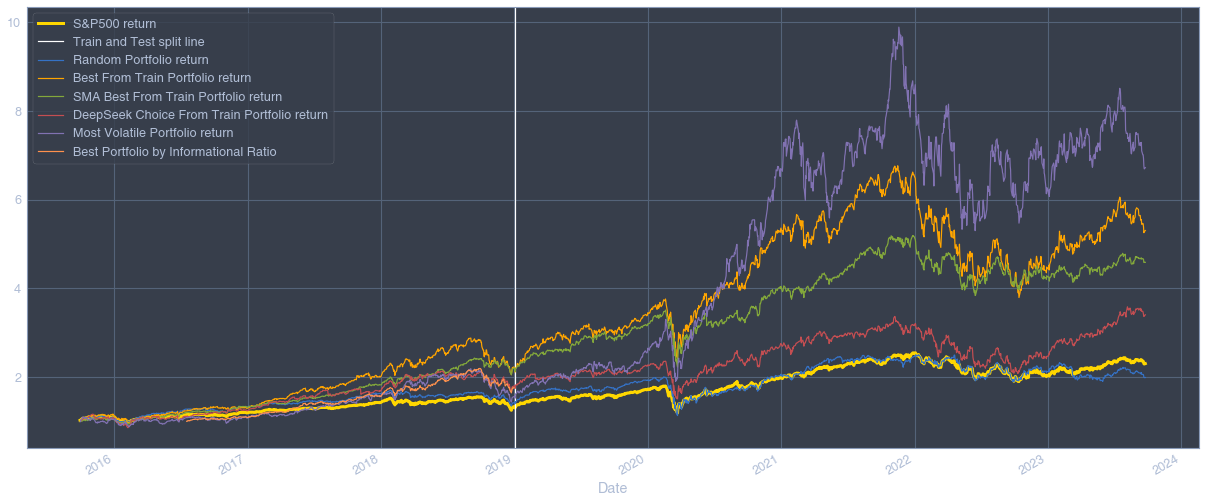

In [58]:
fig, ax = plt.subplots(1, figsize=(21, 9))
sp500['cumm_return'].plot(ax=ax, label='S&P500 return', linewidth=3, c='gold')
ax.axvline('2019-01-02', color='w', label='Train and Test split line')
random_portfolio_df['cumm_return'].plot(ax=ax, label='Random Portfolio return')
train_best_df['cumm_return'].plot(ax=ax, label='Best From Train Portfolio return', c='orange')
sma_best_df['cumm_return'].plot(ax=ax, label='SMA Best From Train Portfolio return')
deepseek_df['cumm_return'].plot(ax=ax, label='DeepSeek Choice From Train Portfolio return')
most_vol_df['cumm_return'].plot(ax=ax, label='Most Volatile Portfolio return')
info_ratio_portfolio['cumm_return'].plot(ax=ax, label='Best Portfolio by Informational Ratio')
ax.legend()